In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# sigularities
def sing(x,a,n):
    if not isinstance(x, np.ndarray):
        x = np.array([x])
    ni = np.zeros(x.size)
    for i in range(x.size):
        if x[i] >=a and n>=0:
            ni[i] = (x[i]-a)**n
    return ni/np.math.factorial(n)

def lx(a,pc, dl, case):
    p1,p2 = pp(dl,case)
    me = m
    if case == 1:
        return m*((1-pc)*sing(xx,0,a)-p1*sing(xx,l0,a)-0.5*sing(xx,dl,a)-p2*sing(xx,l1,a)+pc/2*(sing(xx,lw1,a)+sing(xx,lw2,a)))
    else:
        if case == 3:
            me = mb
        return me*((1-pc)*sing(xx,0,a)-p1*sing(xx,l0,a)-p2*sing(xx,l1,a)+pc/2*(sing(xx,lw1,a)+sing(xx,lw2,a)))

def pp(l,cases=1):
    if cases == 1:
        j = 72
        k = 0.5
    else:
        k = 1
        j = 96
    e1 = k*(l-j)/80
    return k-e1,e1

def trail(a,pc,l2, case=2):
    p1,p2 = pp(l2,case)
    me = m
    if case == 1:
        return m*(p1*sing(xx,l0,a)+p2*sing(xx,l1,a)-0.5*sing(xx,l2+wb,a))
    else:
        if case == 3:
            me = mb
        return me*(p1*sing(xx,l0,a)+p2*sing(xx,l1,a)-0.5*(sing(xx,l2+wb,a)+sing(xx,l2,a)))

In [3]:
# class skidSteer:
#     def __init__(self):
#         self.m =18400
#         self.mb = 10000 # at back
#         self.wheel_b = 48
#         self.st = 104
# skid = skidSteer()

In [15]:
#constants
l1 = 200
l0 =120
lw1 = 179
lw2 = 215
m = 13000
S = 5.61
s2=5.49

st = 104
wb = 48
mb=10000

In [5]:
# I = 16.4
# d_p = 0.0625
# width = 75
# h = d_p/2+3
# i2 = d_p**3*width/12+d_p*width*h**2
# s2 = i2/h
# print(f'I : {i2},   S: {s2}')

I : 43.072509765625,   S: 14.209487757731958


note case on full front, case on half front,

case on back



In [6]:
# predefined arrays
xx = np.linspace(-1,300, 200)
lii = np.arange(60,250,10)

In [16]:
# o_m_l = []
# max_loc = []
# m_full = []

# o_m_l_t = []
# max_loc_t = []
# m_full_t = []

max_p = [[0,0]]
l_f = []

max_p_t = [[0,0]]
l_f_t = []
# loop through locations

for li in lii:
    p = (li+24)/197
    if li < 104:
        case = 1
    elif li <250:
        case = 2
    else:
        case = 3

    # initialize constants for each
    

    #singularity
    
    load = lx(0,p,li,case)
    mom = lx(1,p,li,case)
    
    tip_l = trail(0,p,li,case)
    tip_m = trail(1,p, li,case)
    #, v: {}, m:{}')
    sig = mom/(2*S)  # stress
    sig_t = tip_m/(2*s2)

    l_f.append([load, mom, sig])
    max_sig = np.max(np.abs(sig))

    max_p.append([p*1, max_sig*1])  # max stress for this loading condition and this location

    l_f_t.append([tip_l, tip_m, sig_t])
    max_sig_t = np.max(np.abs(sig_t))

    max_p_t.append([p*1, max_sig_t*1])  # max stress for this loading condition and this location

# tabulation of this location, and max of location
max_p = np.array(max_p)
m_n = np.argmax(max_p,0)
m_a = max_p[m_n[1],:]

# adding to list of all locs
    
# tabulation of this location, and max of location
max_p_t = np.array(max_p_t)
m_n_t = np.argmax(max_p_t,0)
m_a_t = max_p_t[m_n_t[1],:]


# max for each percent, len
for i in range(max_p.shape[0]-1):
    print(f'Dis load loc {round(lii[i],1)}(in) at rear load: {int(max_p[i+1,0]*100)}% = Max \u03C3: {round(max_p[i+1,1],2)}(psi)')


print(f'\n--------------------\noverall max at len(in): {round(lii[m_n[1]-1], 2)}, rear load: {int(m_a[0]*100)}%,  \u03C3 = {round(m_a[1], 2)}(psi)')
# max for each percent, len
print(f'\n\n--------------------\ntrailer\n--------------------\n')
for i in range(max_p_t.shape[0]-1):
    print(f'Dis load loc {round(lii[i],1)}(in) at rear load: {int(max_p_t[i+1,0]*100)}% = Max \u03C3: {round(max_p_t[i+1,1],2)}(psi)')


print(f'\n--------------------\noverall max at len(in): {round(lii[m_n_t[1]-1], 2)}, rear load: {int(m_a_t[0]*100)}%,  \u03C3 = {round(m_a_t[1], 2)}(psi)')

Dis load loc 60(in) at rear load: 42% = Max σ: 44990.16(psi)
Dis load loc 70(in) at rear load: 47% = Max σ: 43725.72(psi)
Dis load loc 80(in) at rear load: 52% = Max σ: 43736.03(psi)
Dis load loc 90(in) at rear load: 57% = Max σ: 43818.98(psi)
Dis load loc 100(in) at rear load: 62% = Max σ: 42883.32(psi)
Dis load loc 110(in) at rear load: 68% = Max σ: 44460.81(psi)
Dis load loc 120(in) at rear load: 73% = Max σ: 37403.5(psi)
Dis load loc 130(in) at rear load: 78% = Max σ: 30346.2(psi)
Dis load loc 140(in) at rear load: 83% = Max σ: 23288.89(psi)
Dis load loc 150(in) at rear load: 88% = Max σ: 16231.58(psi)
Dis load loc 160(in) at rear load: 93% = Max σ: 9174.28(psi)
Dis load loc 170(in) at rear load: 98% = Max σ: 8460.03(psi)
Dis load loc 180(in) at rear load: 103% = Max σ: 8896.12(psi)
Dis load loc 190(in) at rear load: 108% = Max σ: 11997.64(psi)
Dis load loc 200(in) at rear load: 113% = Max σ: 19054.94(psi)
Dis load loc 210(in) at rear load: 118% = Max σ: 26112.25(psi)
Dis load loc 

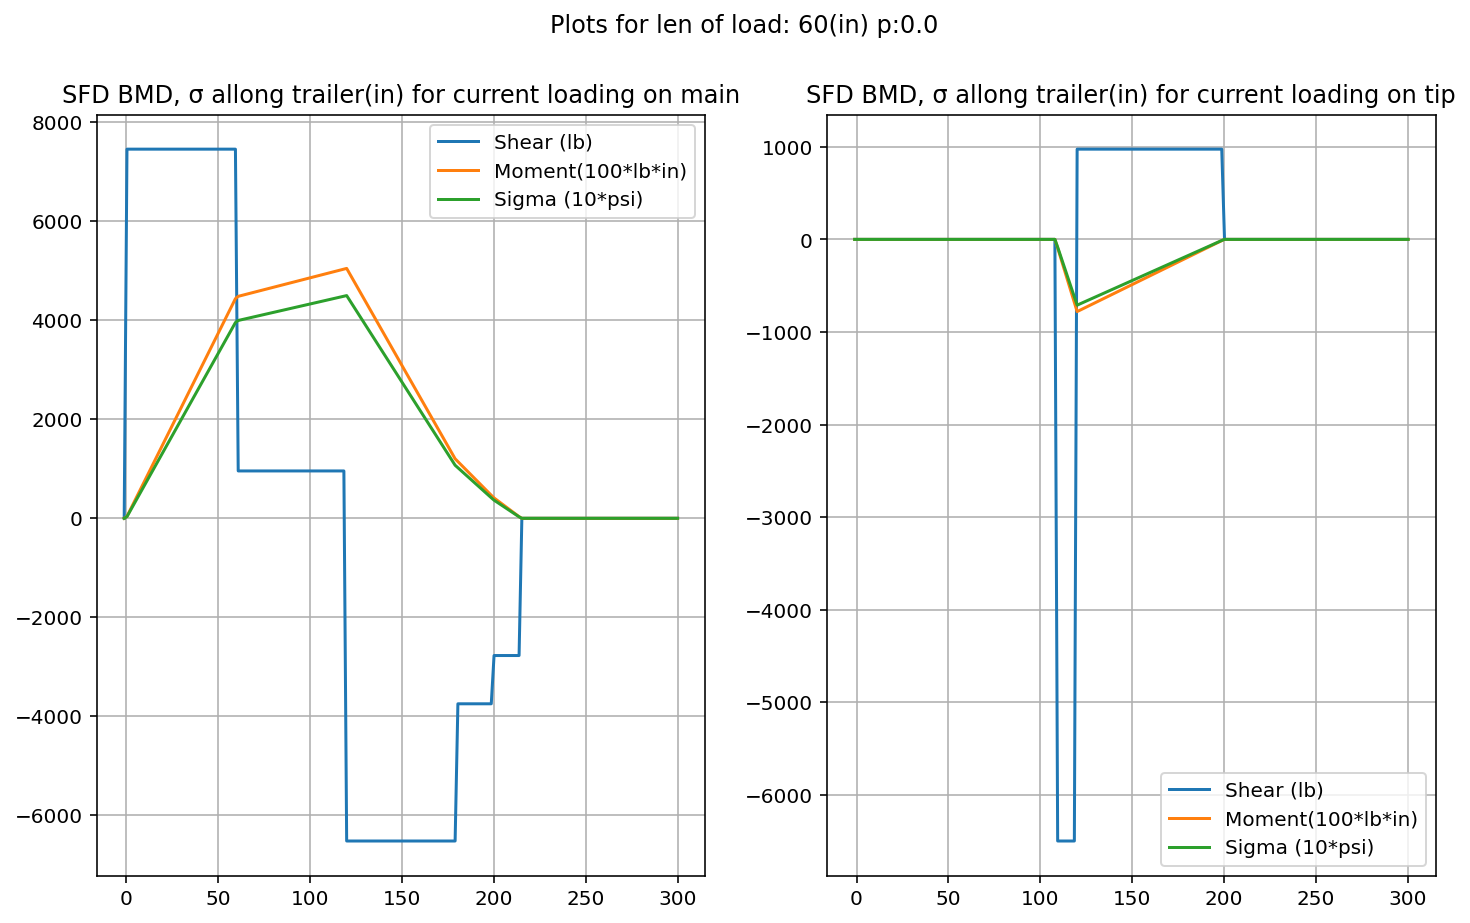

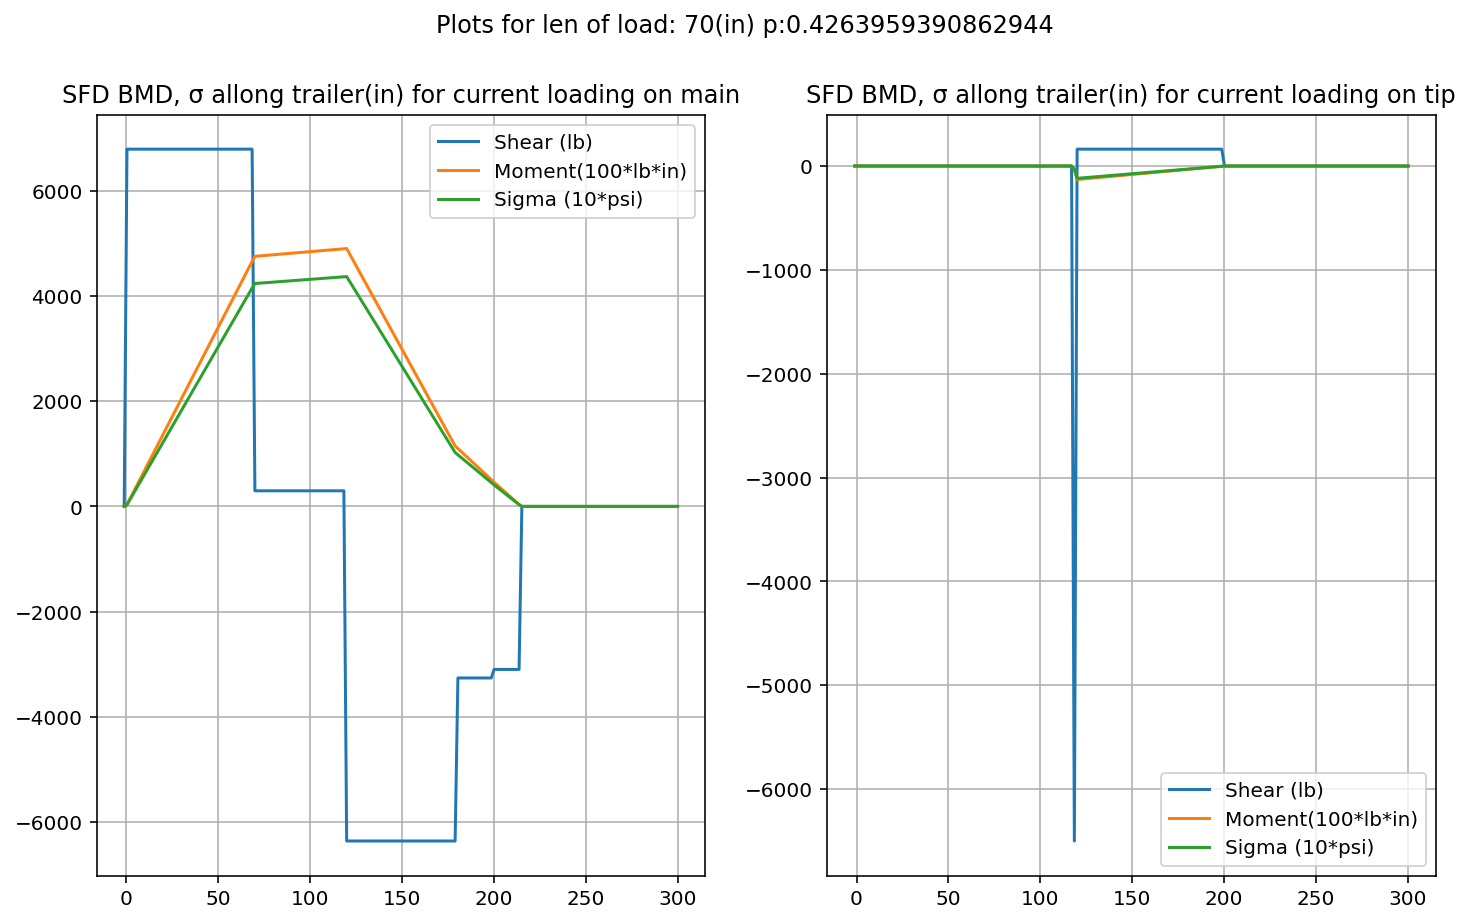

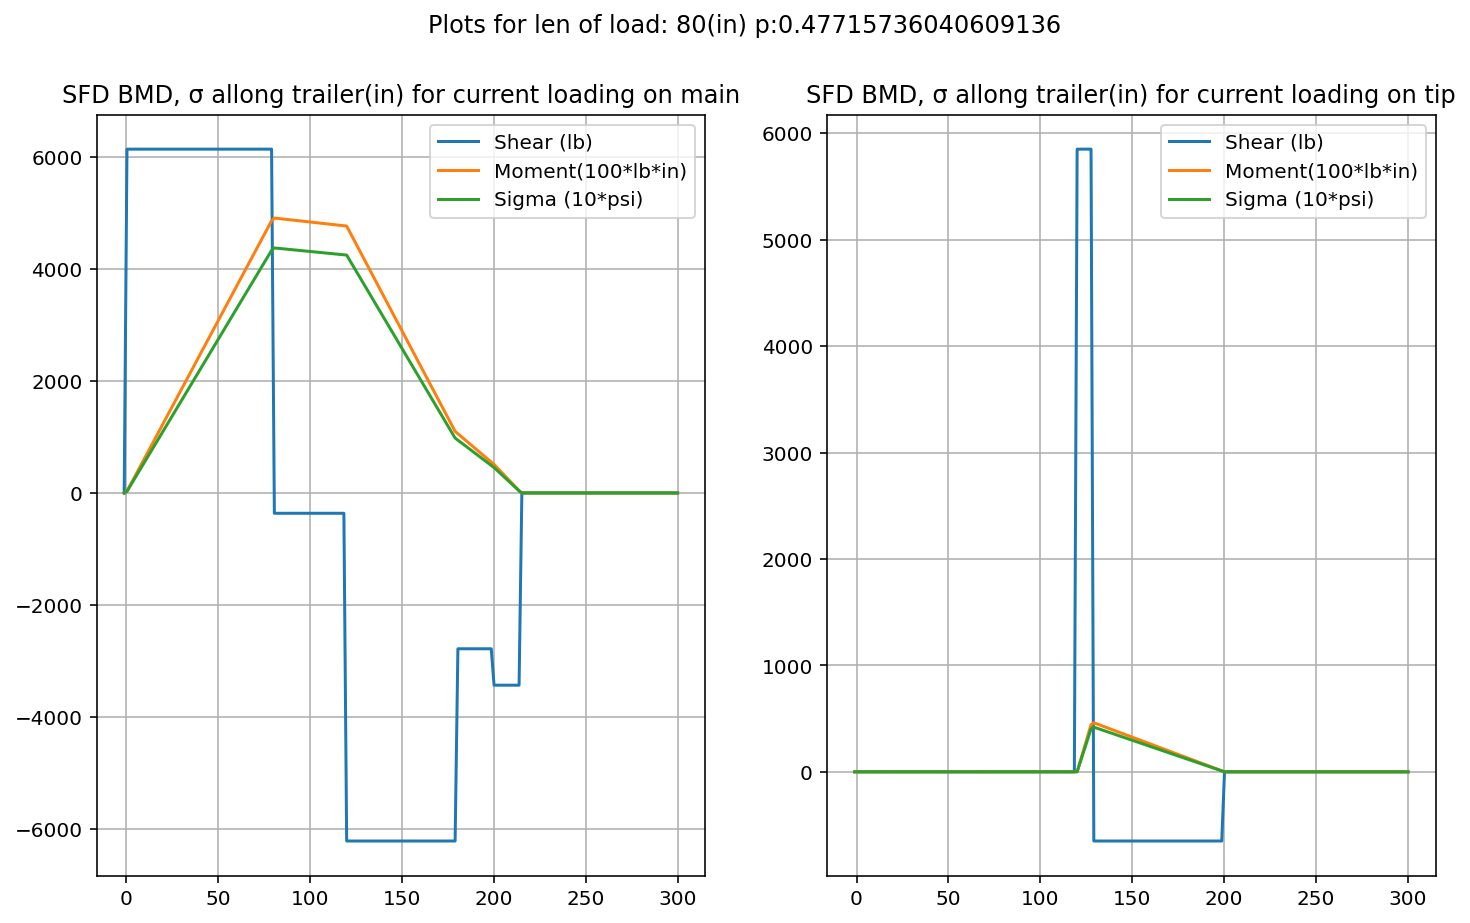

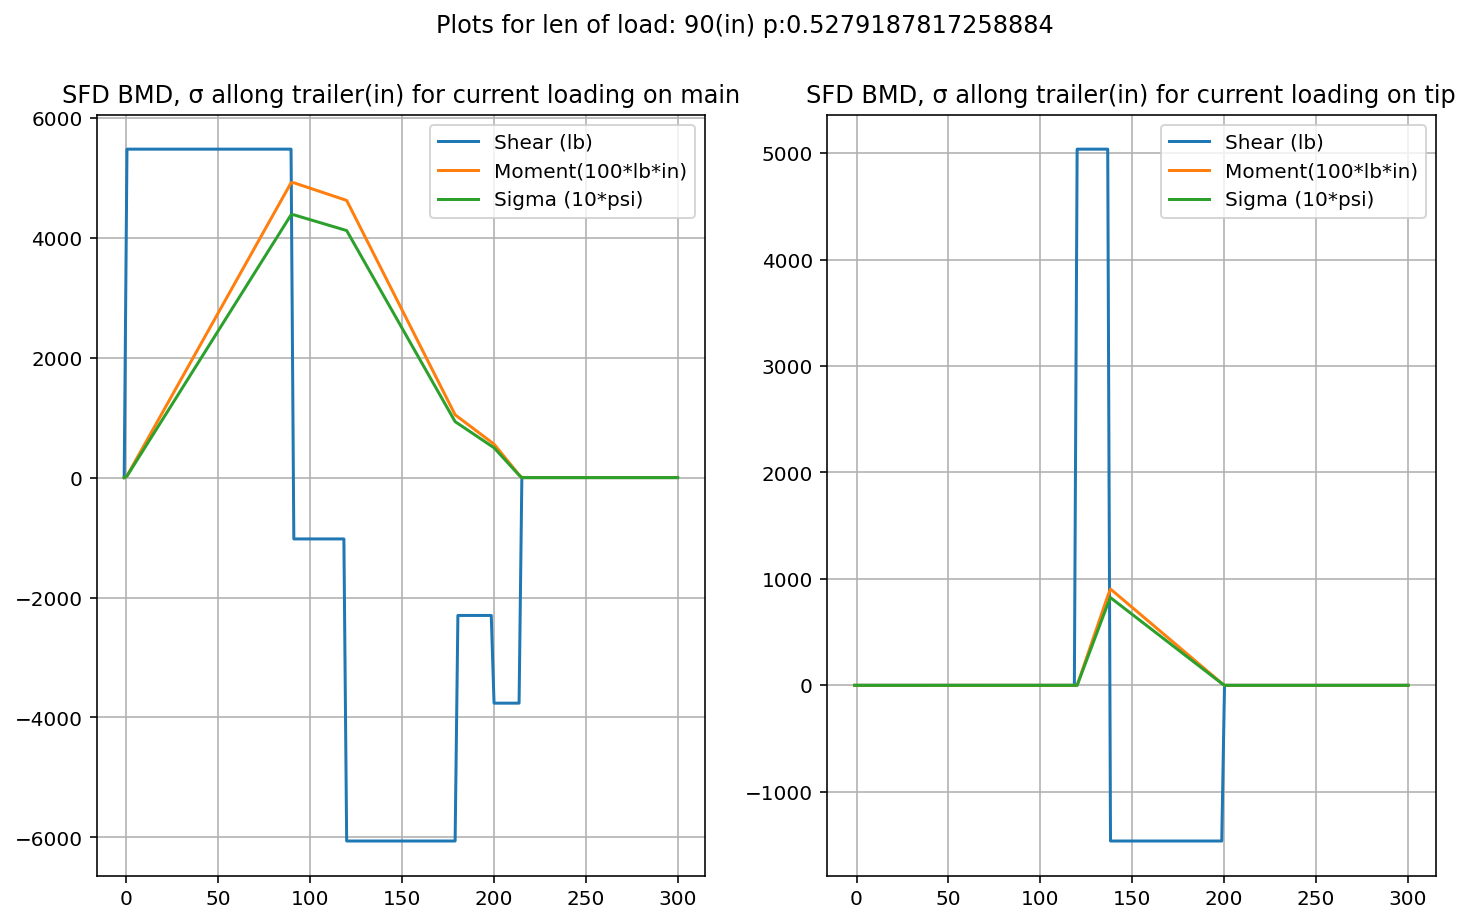

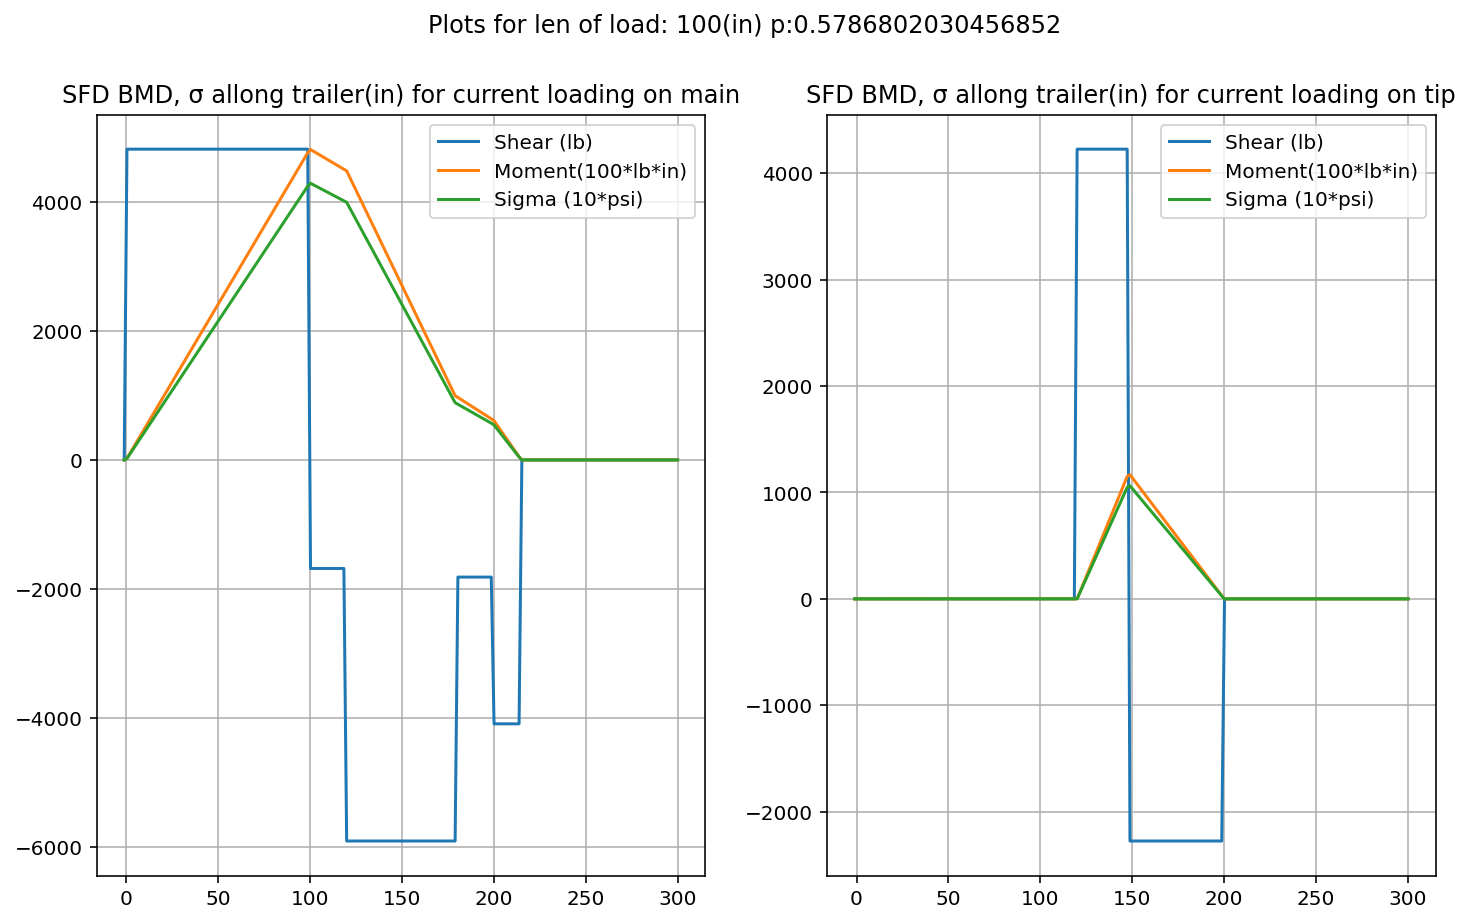

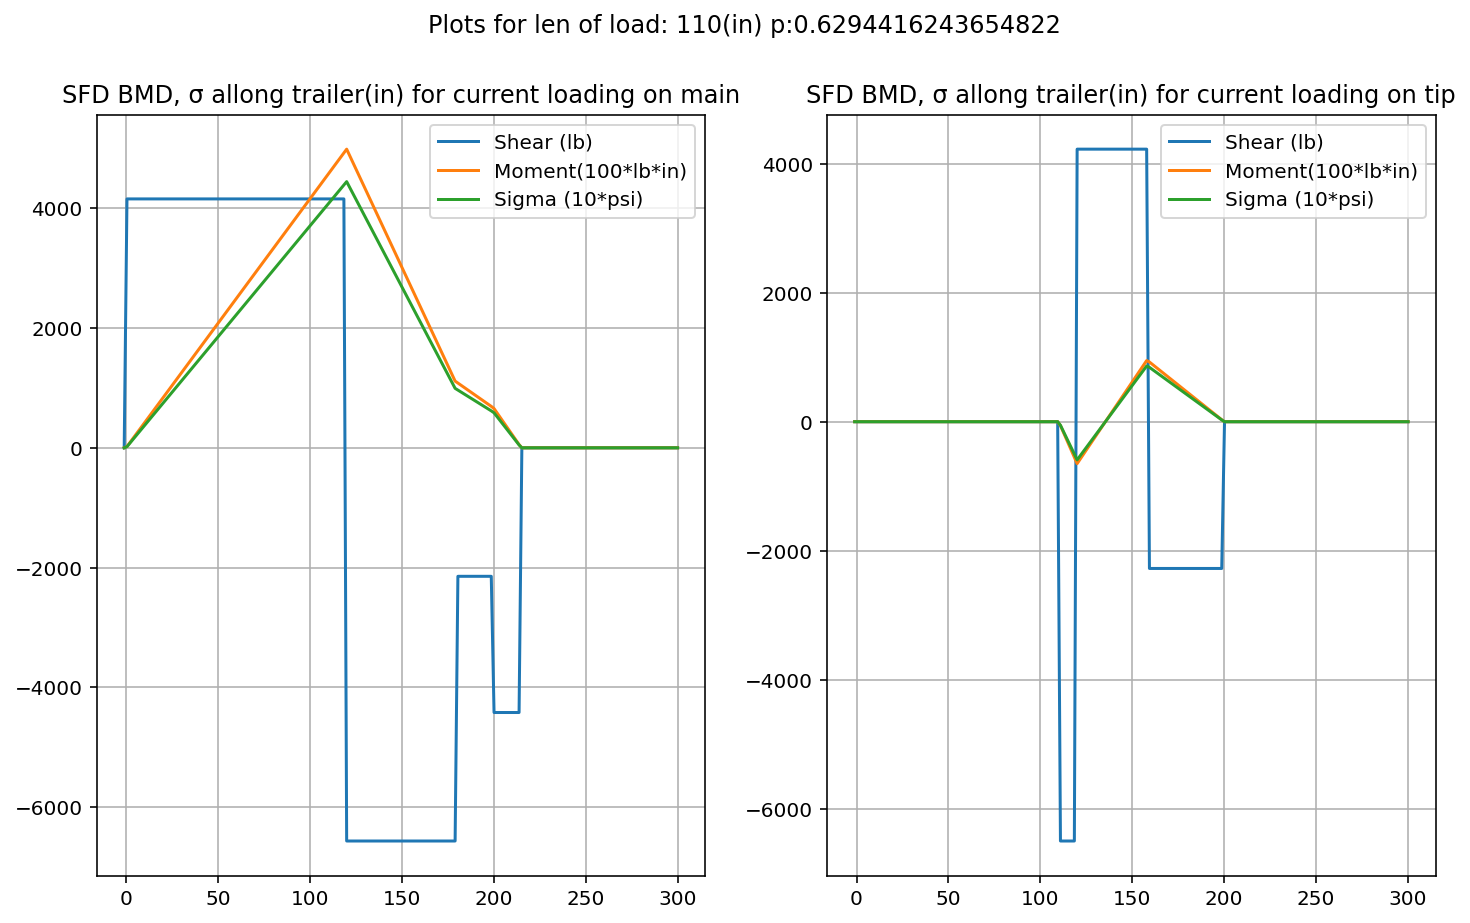

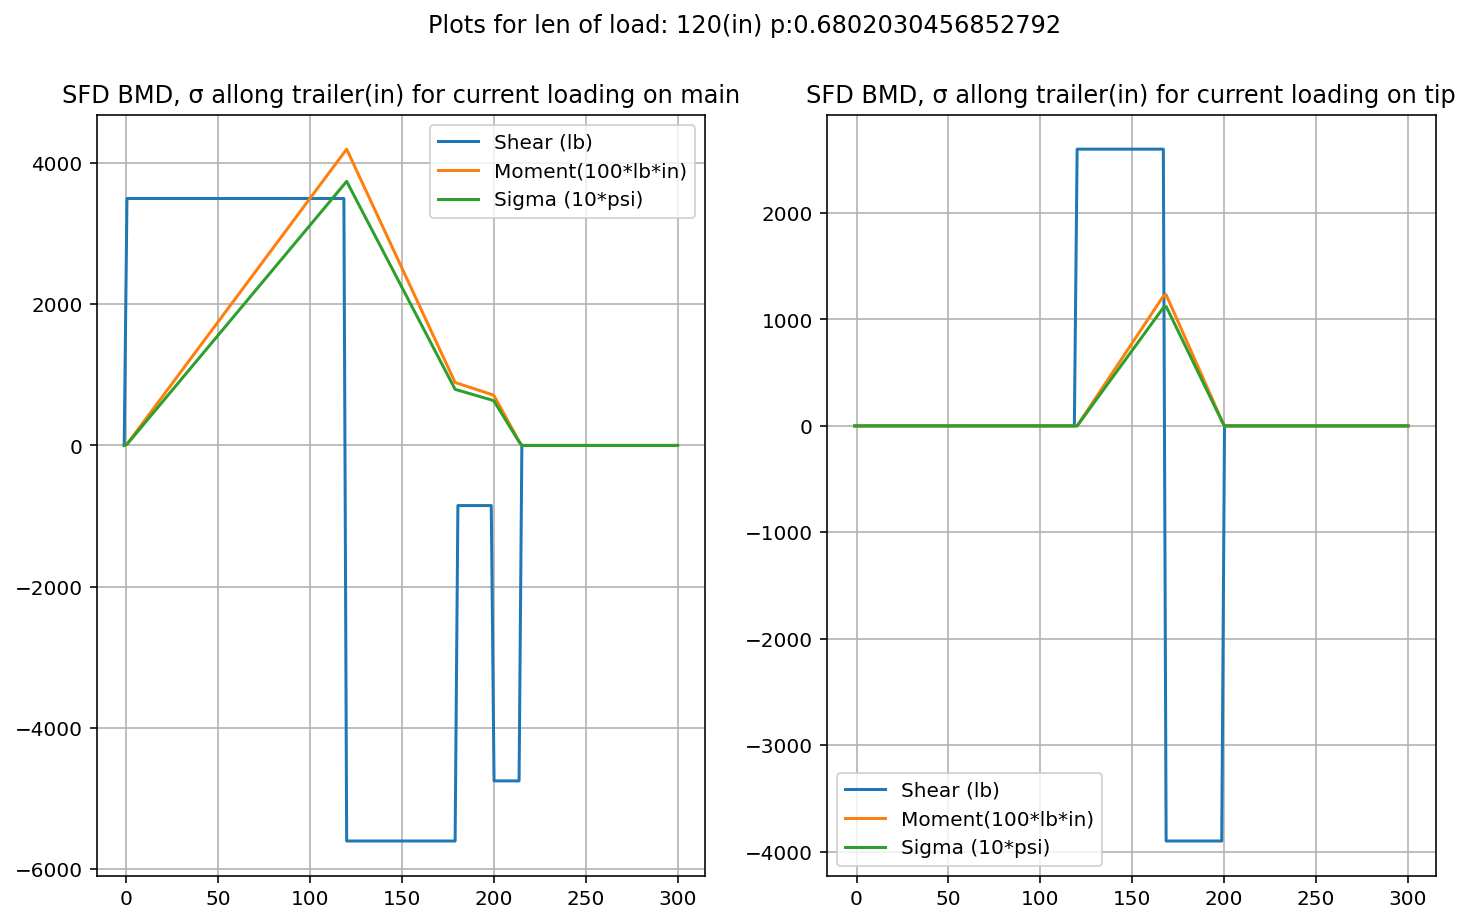

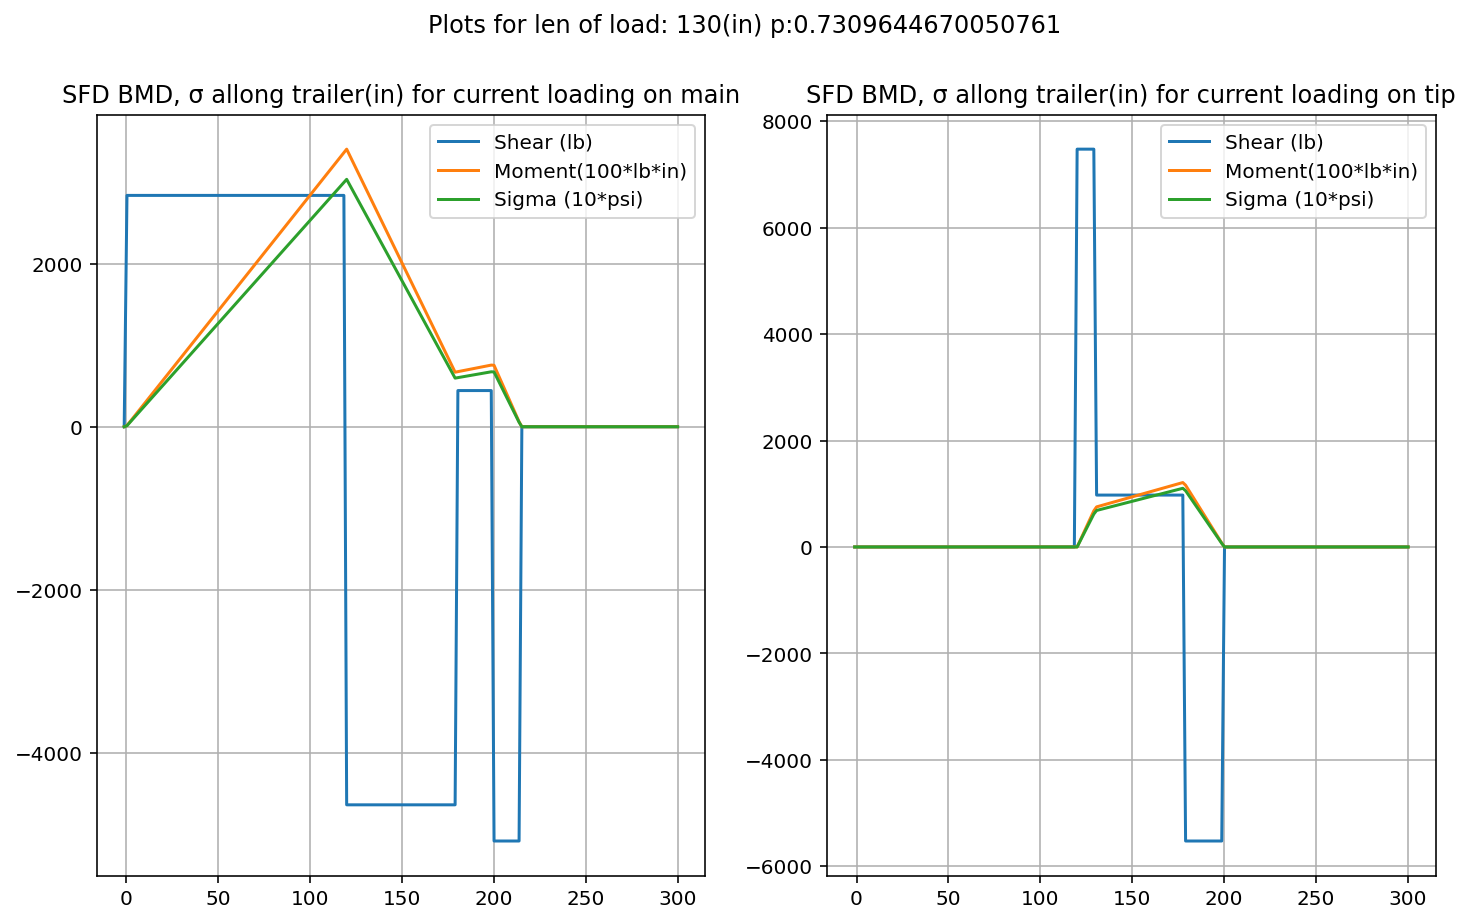

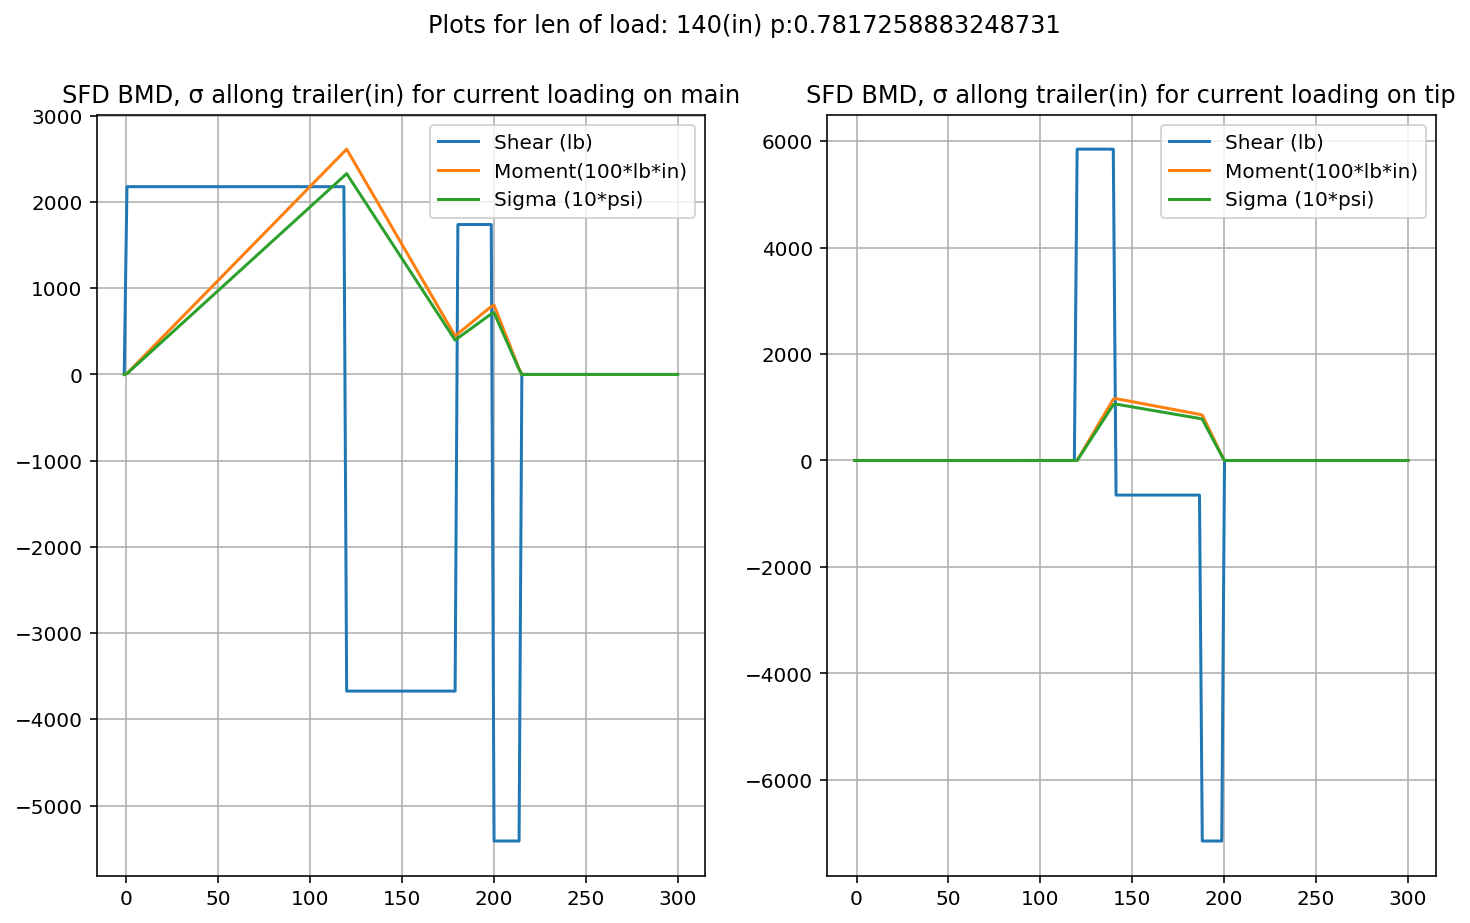

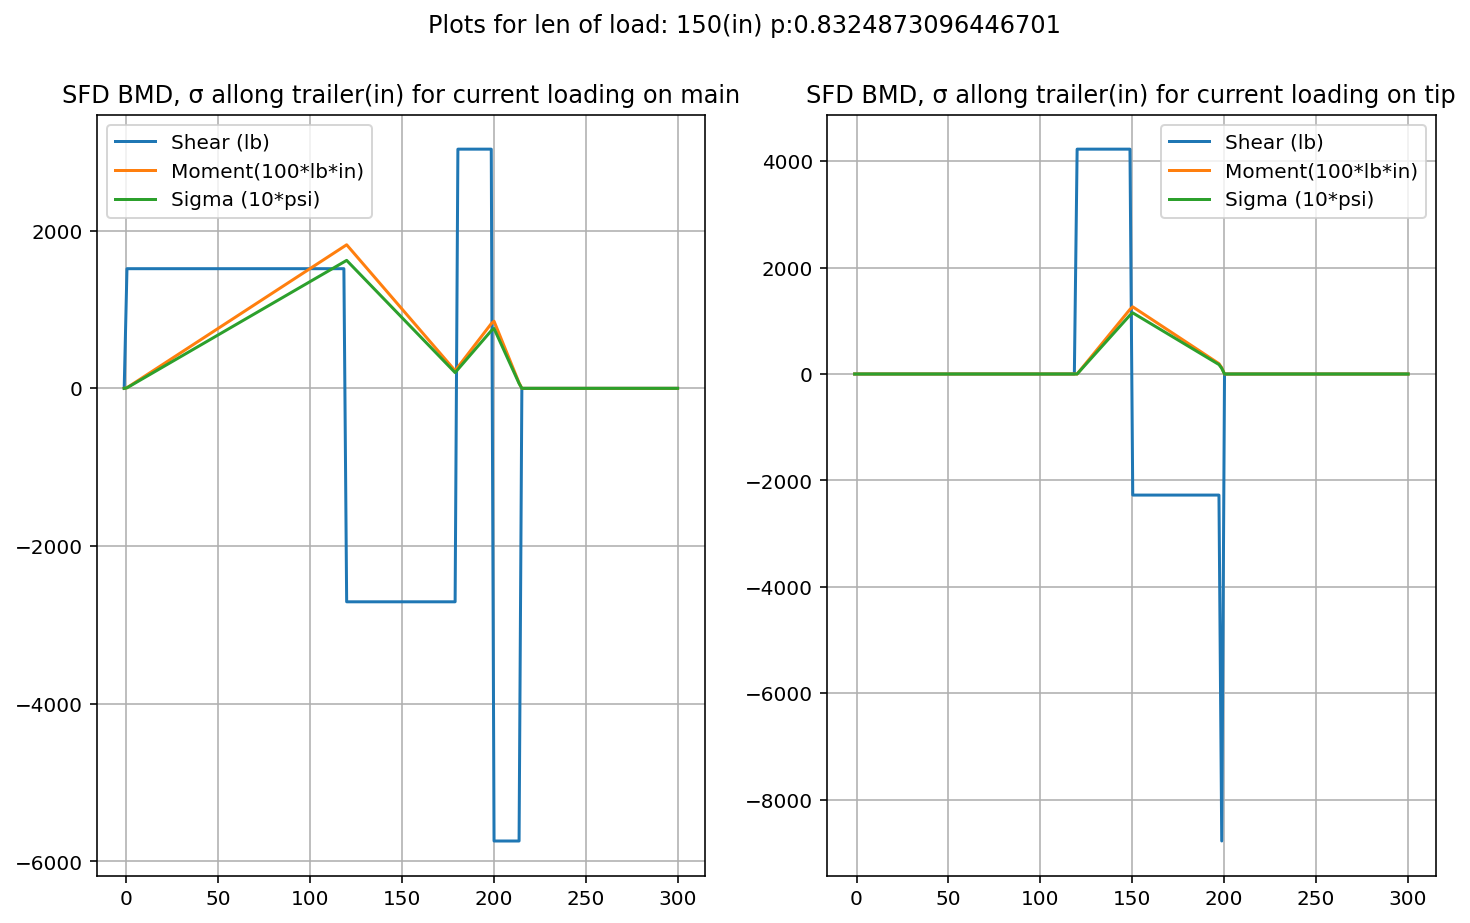

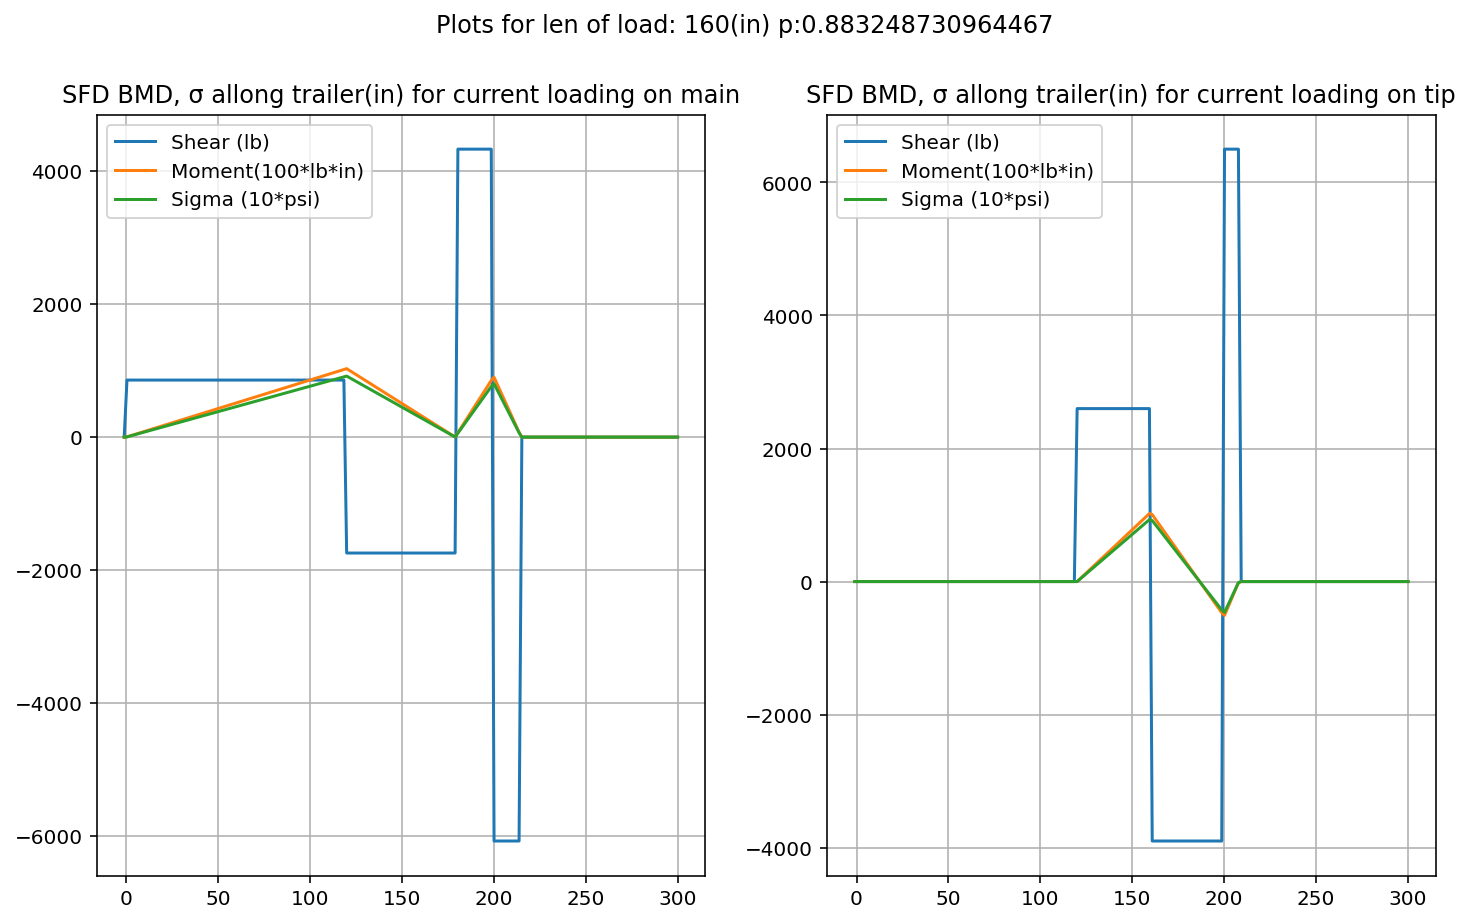

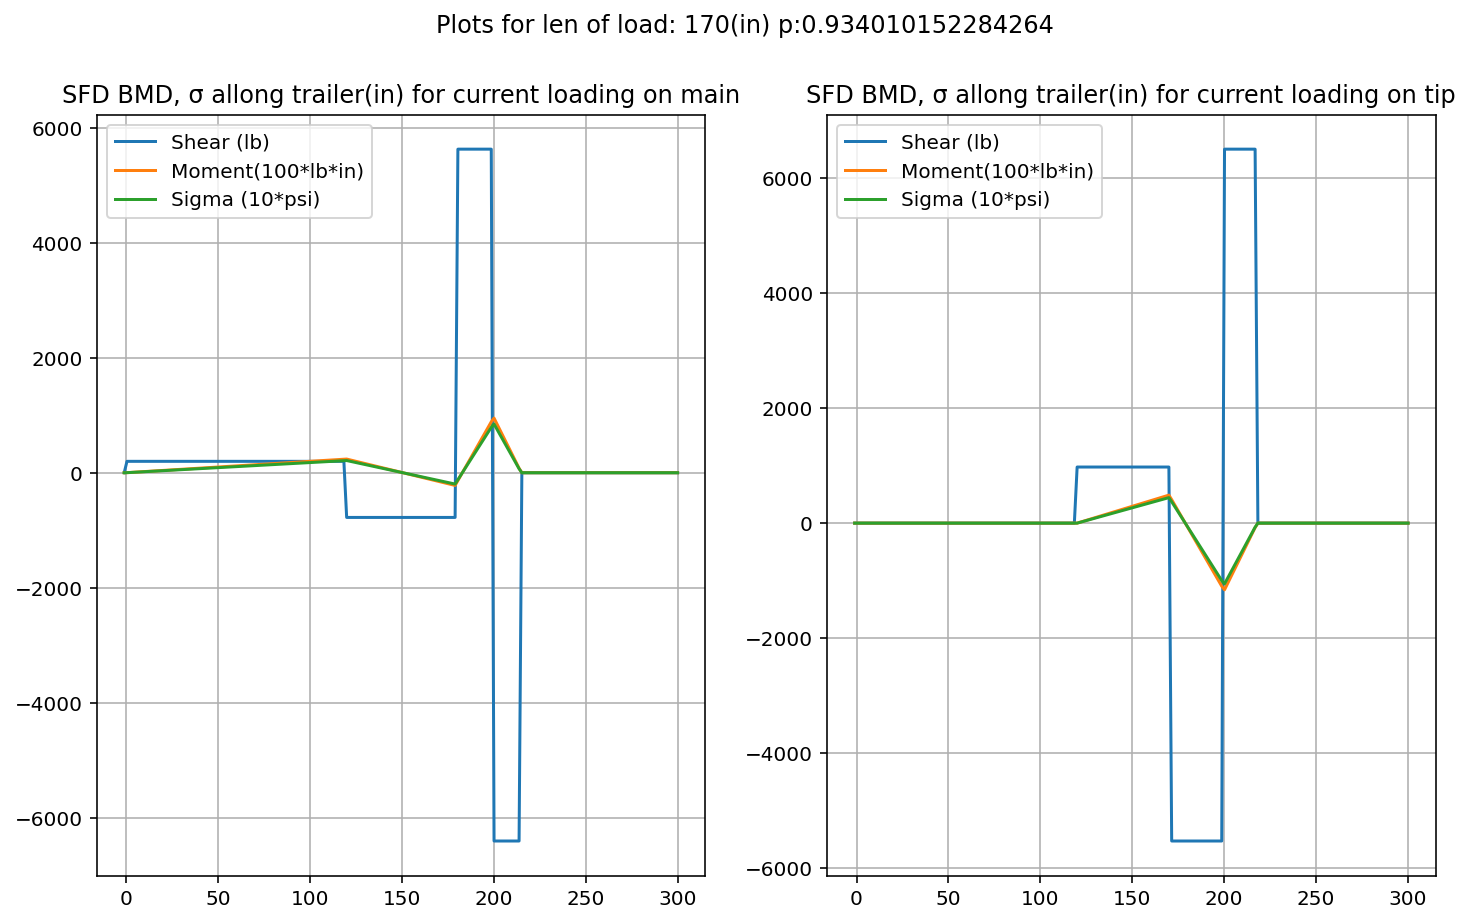

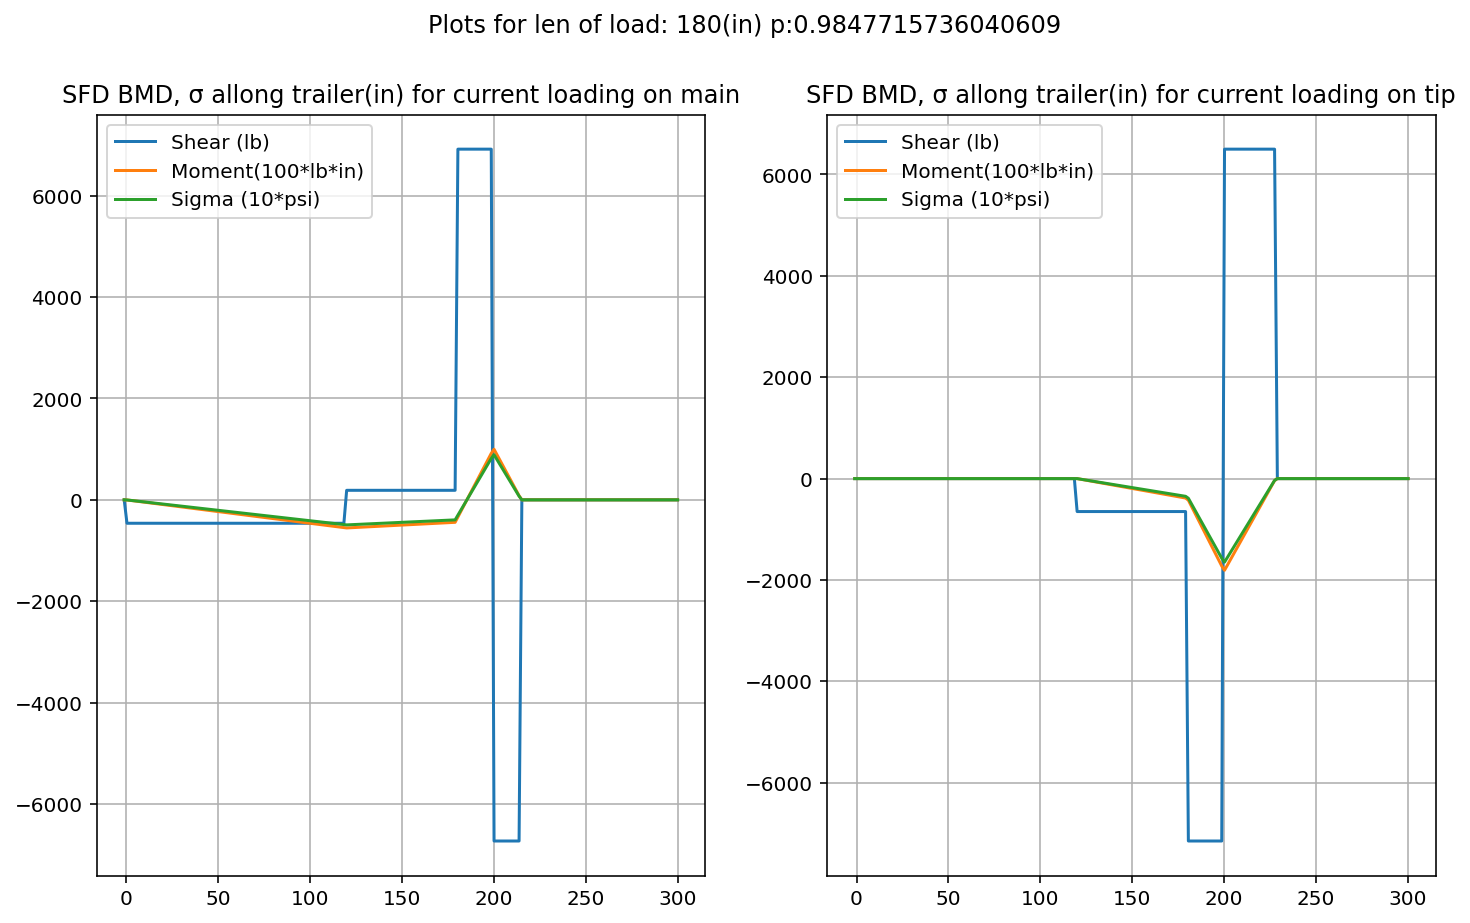

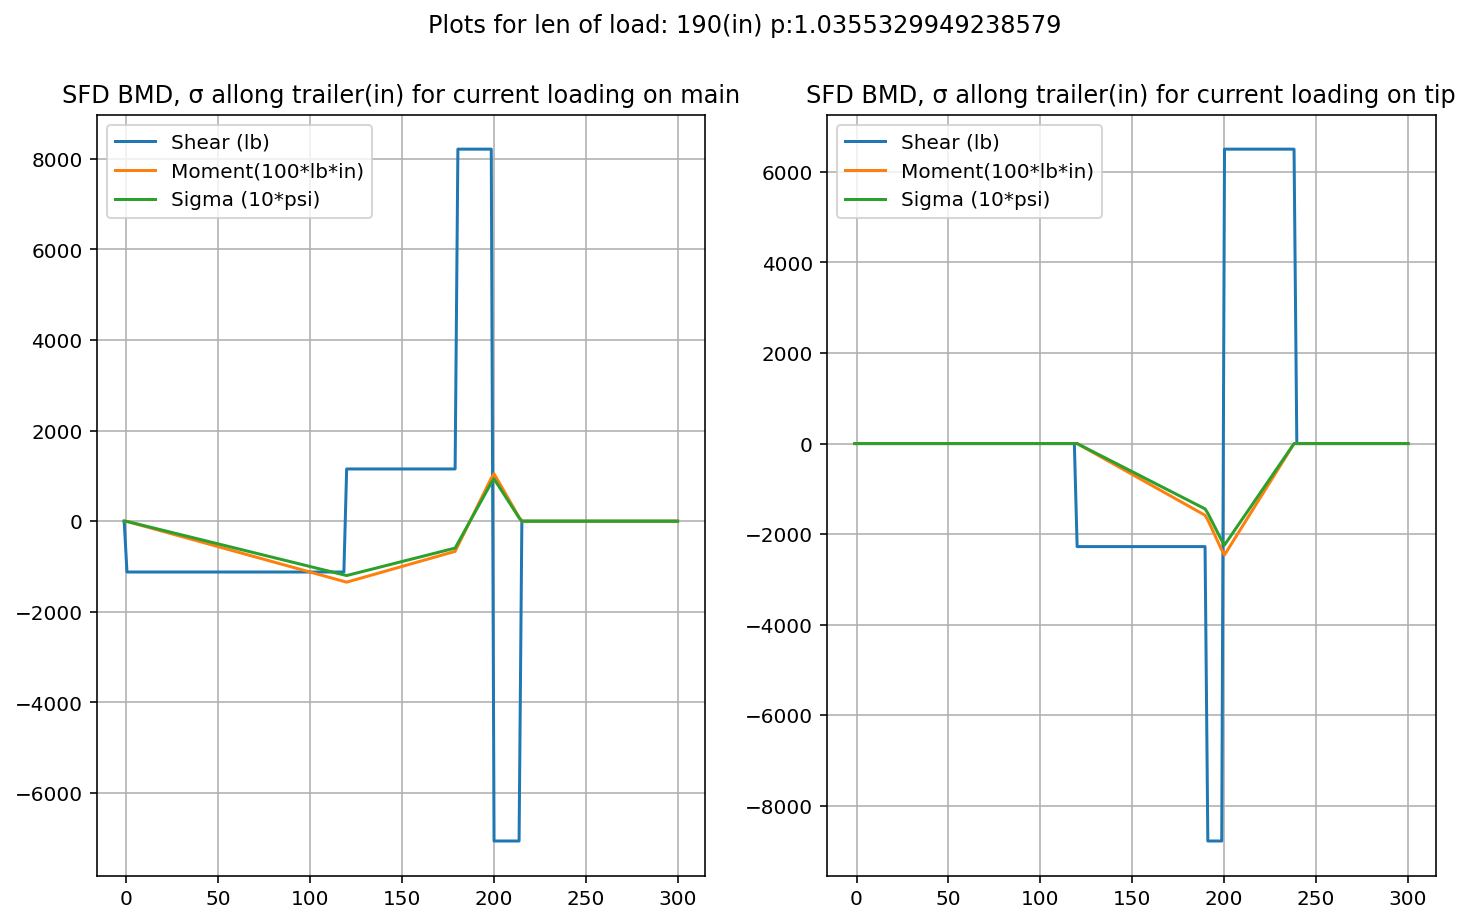

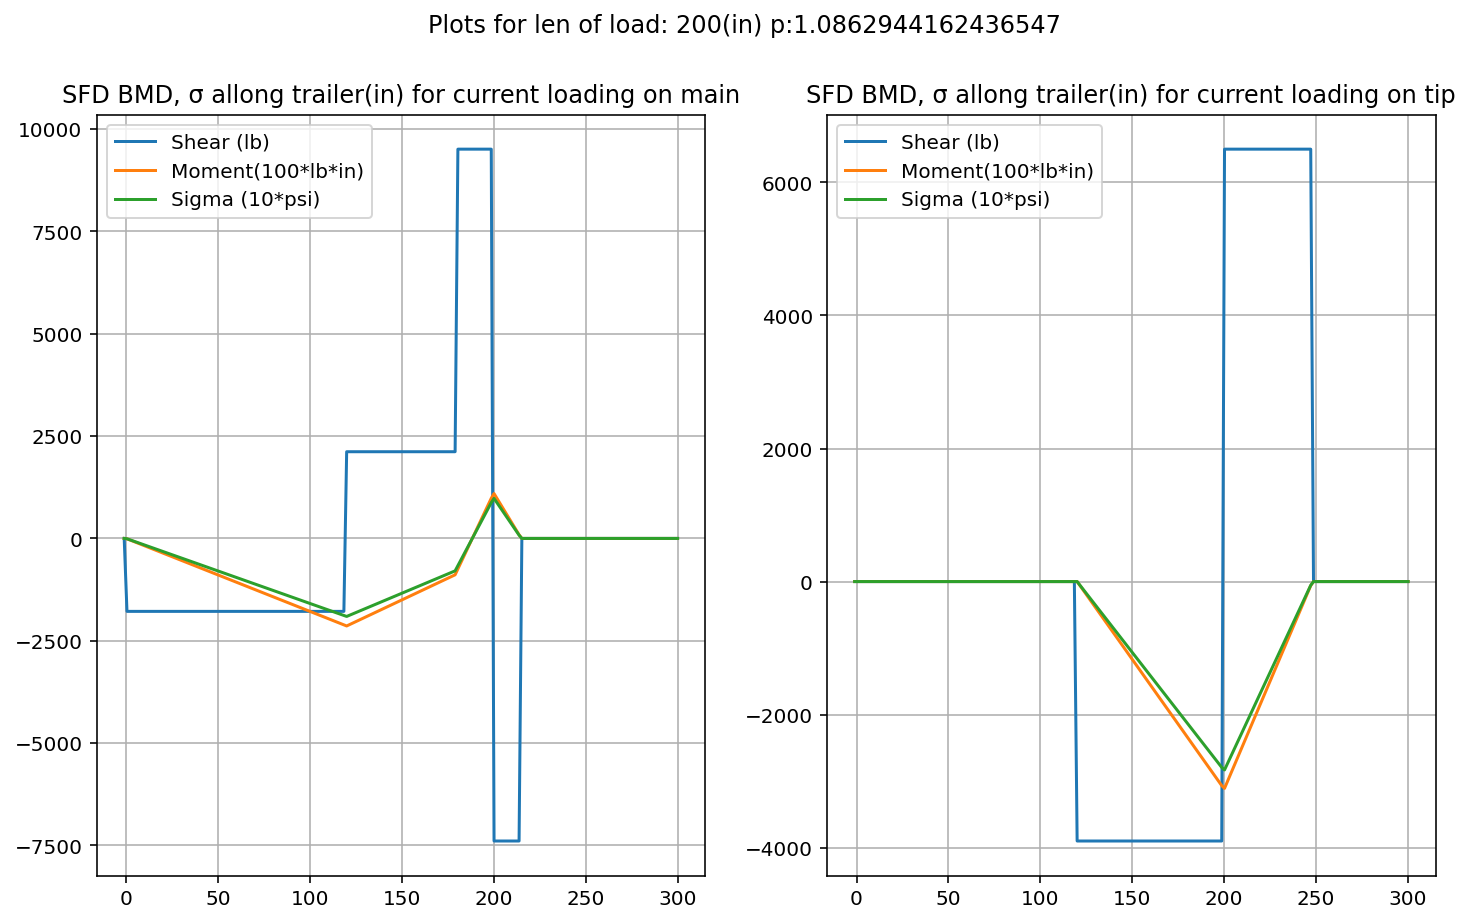

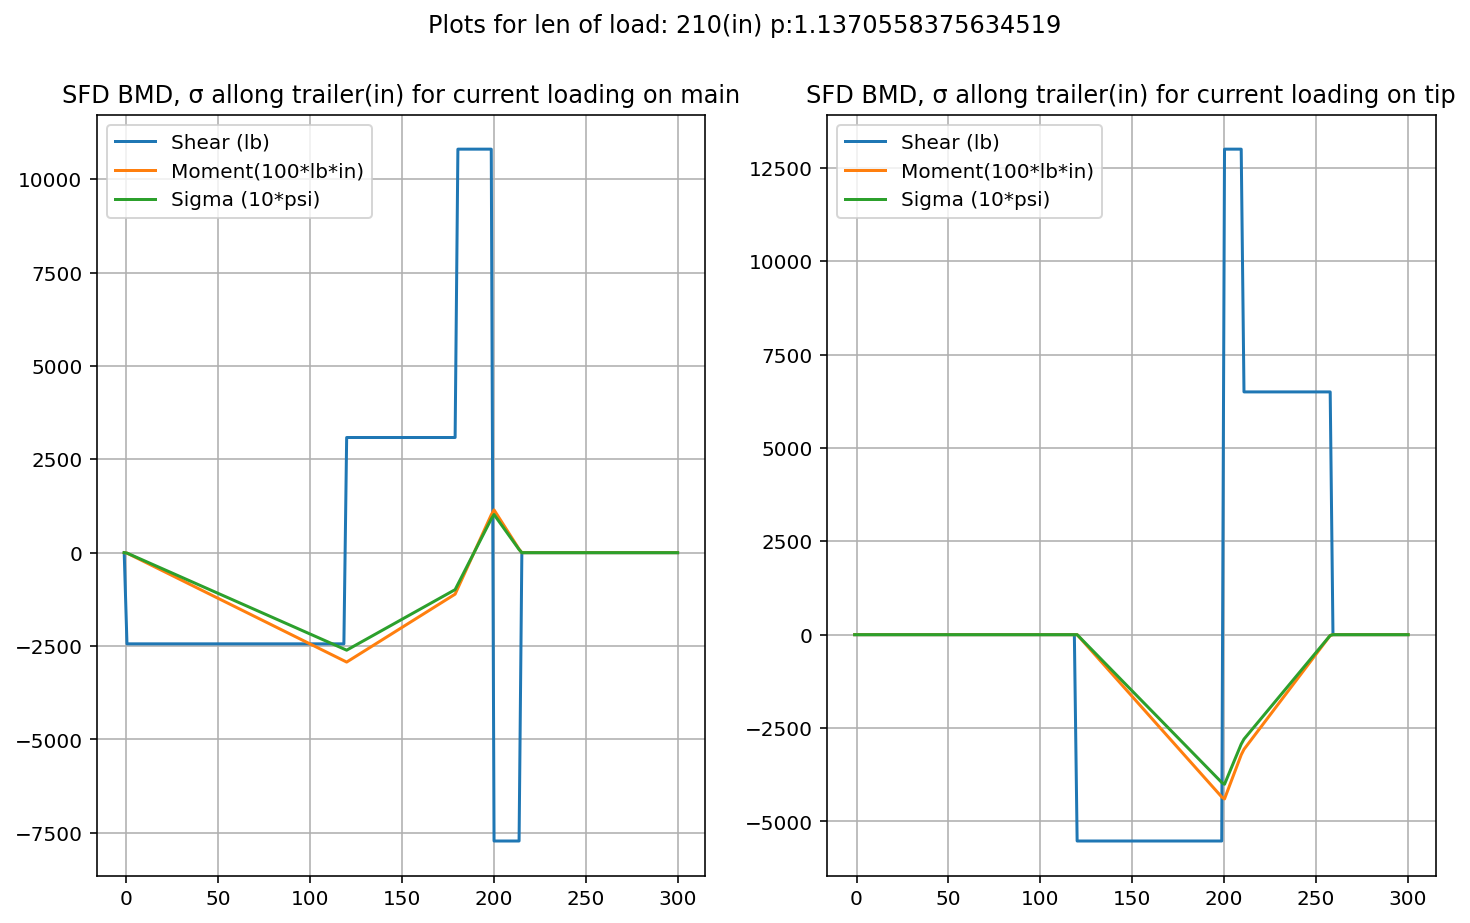

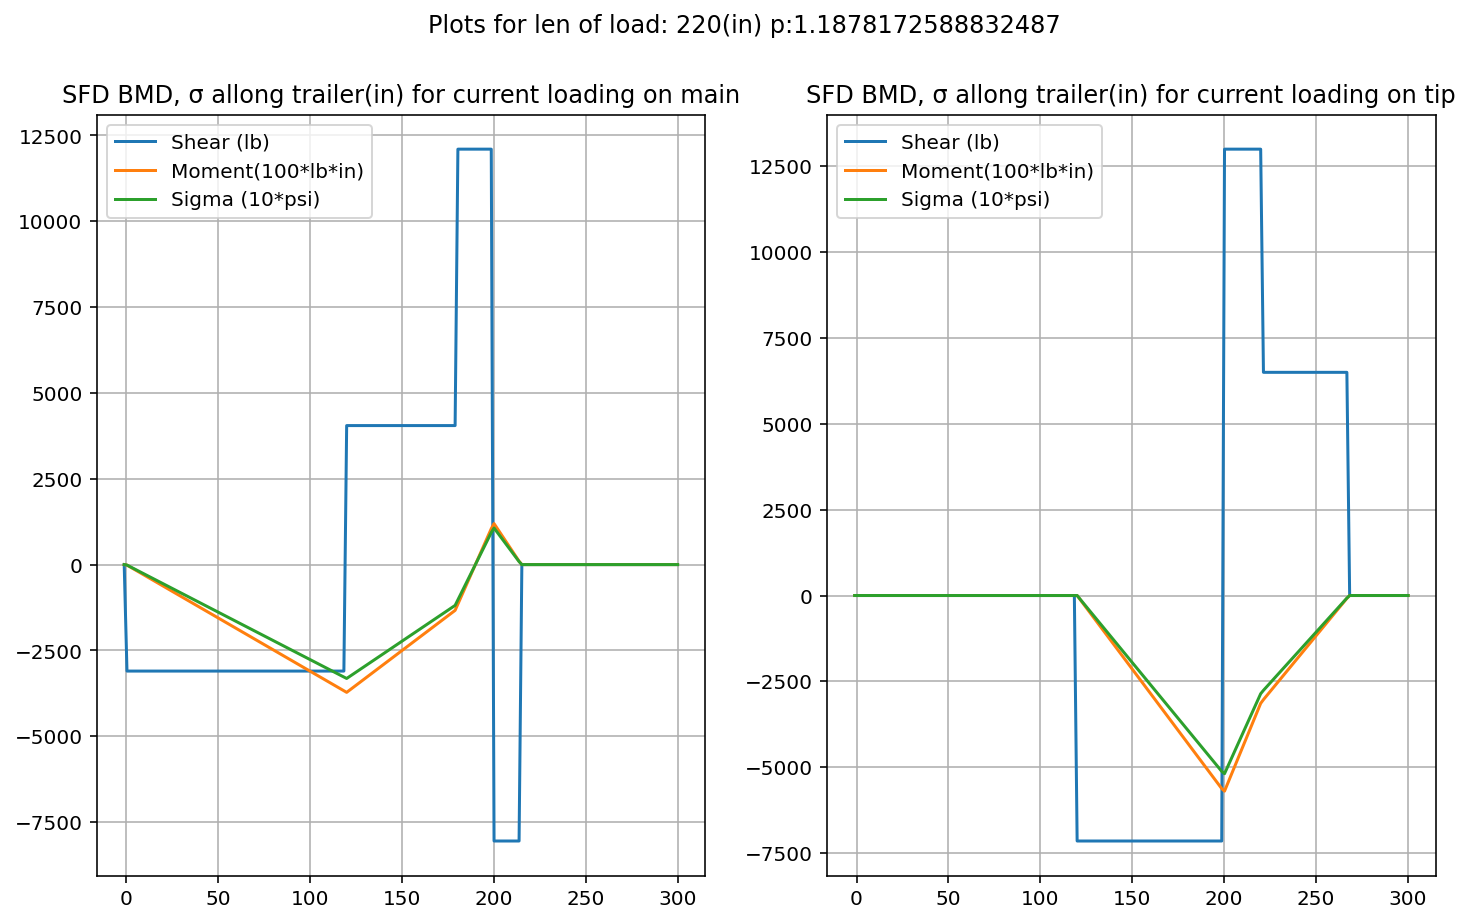

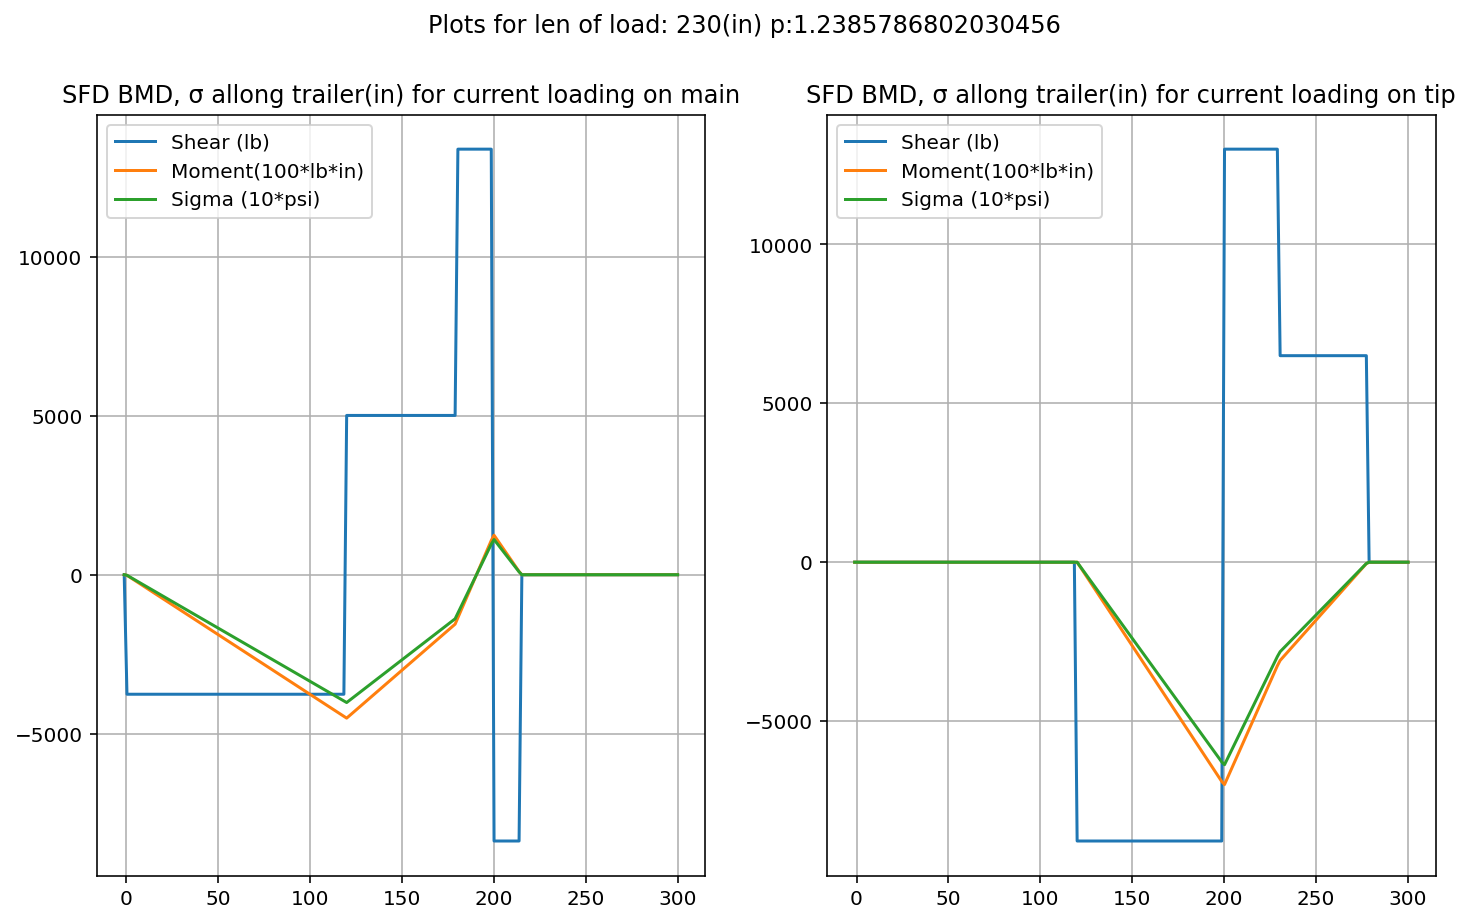

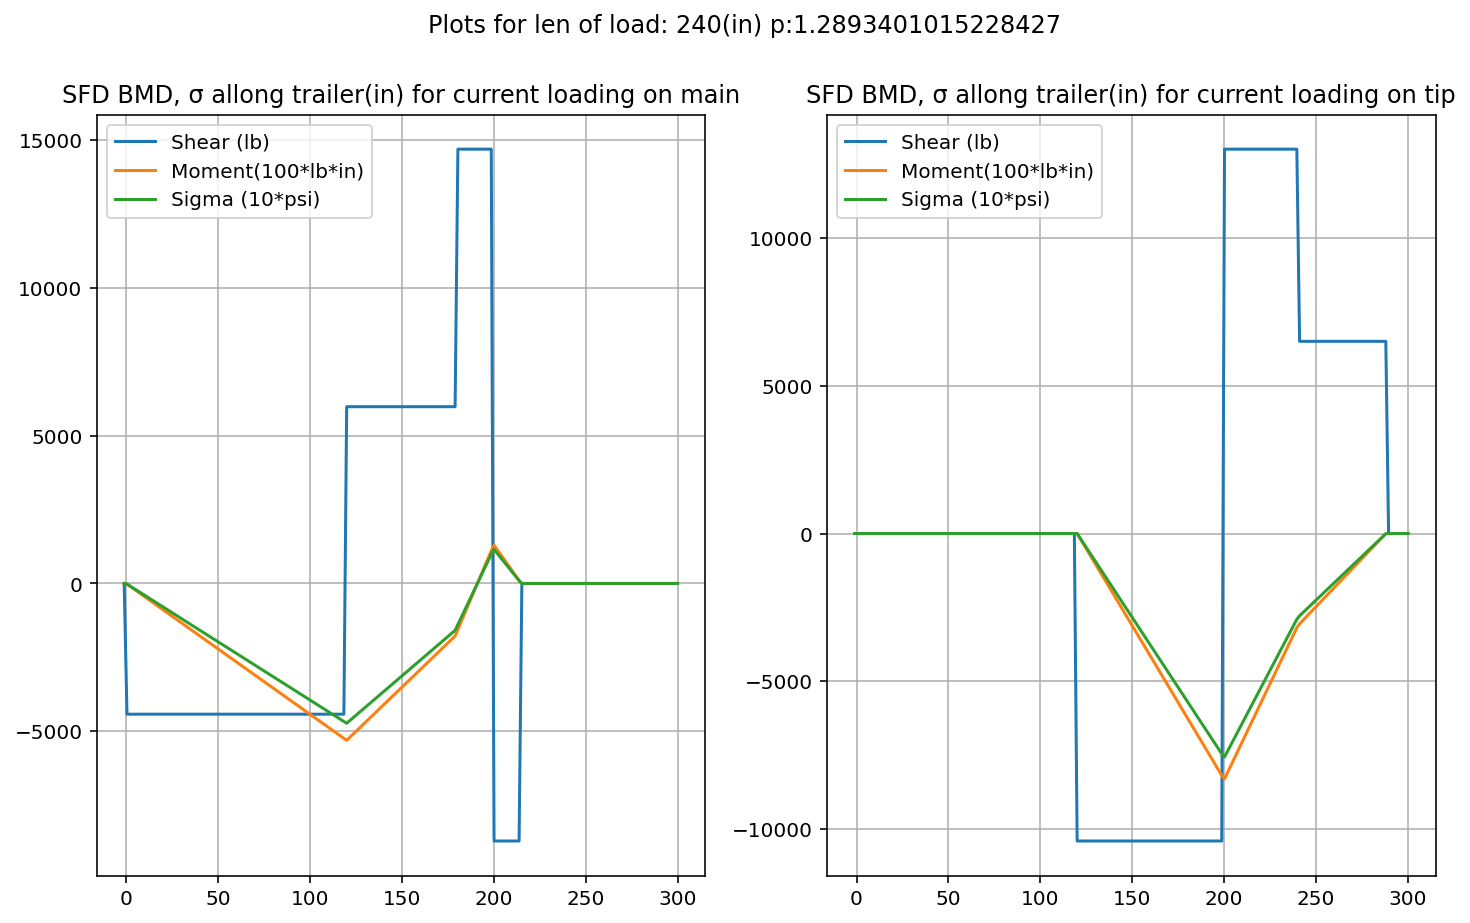

In [17]:
# SFD BMD, \u03C3 vs distance for each condition of len,percent
lft = [l_f,l_f_t]
plt_n = ['main', 'tip']
for ii in range(len(l_f)):
    fig, ax = plt.subplots(1,2)
    for i in range(2):
        ax[i].grid(True)
        m_half = lft[i][ii]

        ax[i].plot(xx,m_half[0])
        ax[i].plot(xx,m_half[1]*1e-2)
        ax[i].plot(xx,m_half[2]*1e-1)

        ax[i].legend(['Shear (lb)', 'Moment(100*lb*in)', 'Sigma (10*psi)'])
        ax[i].set_title(f'SFD BMD, \u03C3 allong trailer(in) for current loading on {plt_n[i]}')
    fig.suptitle(f'Plots for len of load: {round(lii[ii],2)}(in) p:{max_p[ii,0]}')
    
#     fig.show()

# # init plots
# # title = [, '\u03C3(psi) vs length load(in): for  median percent rear load']

# fig, ax = plt.subplots(1,1)
# #for same loc
# ax.plot(max_p[:,0], max_p[:,1])

# # for readbility
# fig.suptitle('overall plots')
# ax.set_title('\u03C3(psi) vs percentage rear load at max condition: for meadian length load')
# fig.show()


In [9]:
# for i in lii:
#     print(i/400)

In [10]:
# lx(0,15,215)

In [11]:
# tp =np.arange(0,220)
# tx = lx(0,15,tp)
# plt.plot(tp,tx)
# tx